# DAG interface

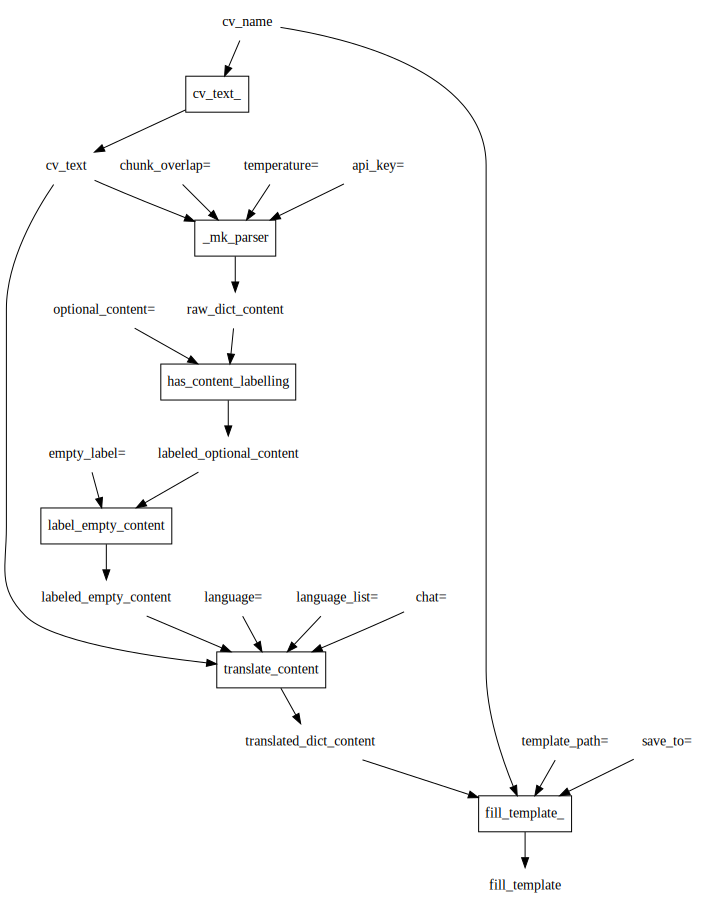

In [1]:
from smart_cv import dag_pipeline
from smart_cv.base import mall
dag = dag_pipeline[:"fill_template"]
dag.dot_digraph()

In [52]:
from smart_cv.base import mall
list(mall.cvs)

['Guillaume.pdf',
 'SCH.pdf',
 'CHAABANE Mohamed.pdf',
 'q_header.docx',
 'HASNAOUI dhekra_CV (1).pdf',
 'Zineb_LAAMARCHI_CV.pdf.235224236 (1).pdf',
 'cv_2024_OMN.pdf',
 'OUSSAMA belcaid_CV.pdf',
 'CV_2024-03-31_Kanda Soufiane_KABA.pdf',
 'cv_2024_OMN_filled.docx',
 'CV_Jonathan.docx',
 'CV_Elena.docx',
 'CV CHAABANE Mohamed (1)_filled.docx',
 'BEN AFIA Wassim_CV.pdf',
 'quentin.pdf']

In [2]:
mall.cvs['q_header.docx']

'\n\n\n\n----media/image1.png----Quentin Roman\n\nExpérience : Missing information\n\nDisponibilité : As soon as possible\n\nMobilité : Missing information\n\nSoftware Engineer\nCompétences :\n\n\nPython, C#, Java, JavaScript, Angular, Node, React, .NET, SQL, Git\n\nExpériences : \n\n\nModel Training for Machine Learning: September 2022 - September 2023\nAmadeus\n\nDeveloped Web-based Angular Application for Hospitality IT business\n\nmissions: \nEnhanced internal Diagnostic tools with new features\n\nImplemented secure permissions system\n\nInvestigated and resolved production issues\n\n\nStacks : C#, Unity, Python, Jupyter Notebook\n\nSoftware Development: September 2021 - February 2022\nAalborg University\n\nDeveloped a VR application for medical purposes\n\nmissions: \nConducted testing sessions involving students and patients\n\nOptimized code for enhanced performance\n\nAnalyzed eye-tracking data\n\n\nStacks : Javascript, C#, Java\n\nNetwork Administration: January 2021 - June 20

In [2]:
content = dag('Guillaume.pdf')

NameError: name 'dag' is not defined

# Association rules
find missing stacks

In [3]:
from smart_cv import mall
len(mall.cvs)

40

In [4]:
mall.cvs['cv_2024_OMN.pdf']

'https://www.linkedin.com/in/othmane-mazouz/\nOthmane MAZOUZ\n06000Nice\nPermisB\n0774463472\nDéveloppeurWeb/MobilefullstackJavaScript\nmazouz.othmane@gmail.com\nJe suis Othmane Mazouz, 29 ans, passioné de développement web/mobile full stack\navec les technologies basées sur JavaScript et/ou PHP. Je dispose d’un background\nmathématique,statistiqueetalgorithmique.\nEXPÉRIENCES FORMATIONS\nDéveloppeur mobile – Smart&Connective - Valbonne. Master2 IngénierieOption Web\nOctobre2021-Novembre2023 Polytech Nice-Sophia -Nice\nSeptembre2020–Septembre 2021\nAgile –Scrum–JavaScript – Type Script–ReactNative –React Navigation –Redux Toolkit–Xcode –\nAndroid Studio–App Store –Play Store– IOS–Android– Appcenter – Fastlane – Gitlab – Git – Jira –\nConfluence – Bash – CI/CD – Mqtt.\nProjet: Développementd’uneapplicationmobilepourinstaller /contrôler les iots à distance .\nIngénierie des données et\n• Structure du projet. connaissances\n• Développement de l’application (Fonctionnement et désigne). ESI

In [5]:
jobtitle = set([
    "data engineer",
    "data scientist",
    "data analyst",
    "business analyst",
    "software engineer",
    "devops",
    "cloud engineer",
    "fullstack",
    "full stack",
    "frontend",
    "backend",
    "pen tester",
    "security",
    "developer",
])

In [8]:
import re

sentence = "a, b \n c. ds"
s2 = "Xamarin, Babylon.js, C#, F#, WordPress, ThreeJS, WebGL"
l = re.split(r'[,\s\n.]+', s2)
#l.remove('')  # Remove any empty strings from the list
print(l)

def set_from_text(txt):
    """ Process a text to extract the set of stack keywords"""
    to_remove = ['\n', '\\', ' ', ',', '.', '(', ')', ':', ';', '!', '?', " de ", " en "]
    for r in to_remove:
        txt = txt.replace(r, ' ')
    stack_db = re.split(r'[,\s\n.]+', txt.lower()) #txt.split(', ')
    for i in range(len(stack_db)):
        if len(stack_db[i]) == 1:
            stack_db[i] = stack_db[i]

    stack_db = set(stack_db)
    return stack_db
stack_db = set_from_text(mall.configs["stacks_keywords.txt"]) 
"git" in stack_db 
unified = stack_db | jobtitle
print(len(unified))

['Xamarin', 'Babylon', 'js', 'C#', 'F#', 'WordPress', 'ThreeJS', 'WebGL']
190


In [9]:
from typing import ItemsView

def cvs_stacks(cvs: ItemsView, stacks: set) -> list[set]:
    """ Find the intersection between the stacks and the cvs.
    Args:
        cvs: Iterable of cvs names
        stacks: set of stack keywords
    Returns:
        list of sets
    """

    intersections = []
    for cv_name, cv_text in cvs:
        cv_text = mall.cvs[cv_name]

        stack_cv = set_from_text(cv_text)
        intersection = stack_cv.intersection(stacks)
        intersections.append(intersection)
    return intersections    
transactions = cvs_stacks(mall.cvs.items(), unified)


In [ ]:
# save transactions


In [10]:
# from typing import List
# def plot_hist_stack(list_stack:List[set]):
#     """ Plot the histogram of the stack"""
#     stack = []
#     for s in list_stack:
#         stack.extend(s)
#     stack = pd.Series(stack)
#     stack.value_counts(normalize=True).plot.bar()

# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 5))
# plot_hist_stack(transactions)

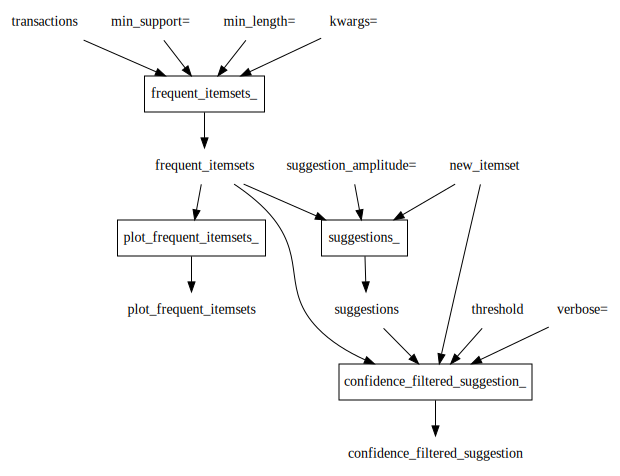

In [118]:
from meshed import DAG
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

def frequent_itemsets(transactions, min_support=0.1, min_length=2, **kwargs):
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True, **kwargs)
    #return frequent_itemsets with at least min_length items 
    return frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) >= min_length)]

def plot_frequent_itemsets(frequent_itemsets):
    frequent_itemsets.plot.bar(x='itemsets', y='support')



# inferencing
def suggestions(new_itemset, frequent_itemsets, suggestion_amplitude=0.5):
    """ Suggest a set of items based on the new itemset and the frequent itemsets."""
    # empty set for suggestions
    suggestions = frozenset()
    for frequent_itemset in frequent_itemsets['itemsets']:
        if new_itemset.issubset(frequent_itemset):
            suggestion = frequent_itemset.symmetric_difference(new_itemset)
            # add suggestion to suggestions
            suggestions = suggestions.union(suggestion)
        else:
            freq_new_intersection = frequent_itemset.intersection(new_itemset)
            if len(freq_new_intersection) == len(frequent_itemset) - int(len(frequent_itemset) * suggestion_amplitude):
                suggestion = frequent_itemset.symmetric_difference(freq_new_intersection)
                # add suggestion to suggestions
                suggestions = suggestions.union(suggestion)
    return suggestions


def confidence(frequent_itemsets: pd.DataFrame, itemset_A: set, itemset_B: set):
    """ confidence of itemset_A => itemset_B"""
    itemset_A = set(itemset_A)
    itemset_B = set(itemset_B)
    support_A = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: itemset_A.issubset(x))]['support'].max()
    df_A_B = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: itemset_A.union(itemset_B).issubset(x))]
    if df_A_B.empty or support_A == 0:
        return 0
    support_A_B = df_A_B['support'].max()
    return support_A_B / support_A

def confidence_filtered_suggestion(frequent_itemsets, suggestions, new_itemset, confidence_threshold, verbose=False):
    """ Keep only the suggestions with a confidence above the threshold"""
    suggestions_ = set()
    for suggestion in suggestions:
        c = confidence(frequent_itemsets, new_itemset, set([suggestion]))
        if verbose:
            print("confridence of :", new_itemset, "=>", suggestion, " = ", c)
        if c  > confidence_threshold:
            suggestions_.add(suggestion)
    return suggestions_

# def test_confidence_filtered_suggestion():
#     suggestions_ = set(["javascript", "api"])
#     new_itmeset = set(["docker", "git"])
#     s = confidence_filtered_suggestion(f, suggestions_, new_itmeset, 0.5, verbose=True)
#     assert s == set(["api"])


funcs = [frequent_itemsets,
         plot_frequent_itemsets, 
         suggestions,
        confidence_filtered_suggestion
        ]
dag = DAG(funcs)
dag.dot_digraph()

#new_itmeset = set(["javascript", "jenkins", "jira"])

In [125]:
f = dag[:"frequent_itemsets"](transactions=transactions, min_support=0.36, min_length=3)
#f.plot.bar(x='itemsets', y='support')
print(len(f))
f.head(10)

3


,support,itemsets
55,0.375,"(docker, git, api)"
56,0.375,"(javascript, docker, api)"
57,0.400,"(javascript, docker, git)"


In [127]:
new_itmeset = set(["docker", "git"])
s = dag["suggestions_":"confidence_filtered_suggestion"](new_itemset=new_itmeset, frequent_itemsets=f)


TypeError: missing a required argument: 'threshold'

In [112]:
from random import randint
from tqdm import tqdm


def evaluate(filtered_transactions, frequent_itemsets, suggestion_function, confidence_threshold, verbose=False):
    avg_precision = 0
    avg_recall = 0
    avg_len_suggestion = 0
    avg_saved = 0
    for t in filtered_transactions:
        #remove some elements of the set transaction randomly: pick max n-1 number of elements to remove in 
        nb_to_remove = randint(1, len(t)-1)
        to_remove = [randint(0, len(t)-1) for i in range(nb_to_remove)]
        missing = [list(t)[i] for i in to_remove]
        uncompleate = t - set(missing)
        suggestion_= suggestion_function(new_itemset=uncompleate, frequent_itemsets=frequent_itemsets)

        if len(suggestion_) == 0:
            precision = 0
            recall = 0
        else:
            TP = len(suggestion_.intersection(set(missing)))
            FP = len(suggestion_)-TP
            FN = len(missing)-TP
            precision = TP/(TP+FP)
            recall = TP/(TP+FN)

        avg_len_suggestion += len(suggestion_)
        # print(f"missing = {missing}")
        # print(f"suggestion = {suggestion_}\n")
        avg_precision += precision
        avg_recall += recall
        avg_saved += len(suggestion_)*precision
    
    f2 = 5*avg_precision*avg_recall/(4*avg_precision+avg_recall) if avg_precision+avg_recall != 0 else 0
    precision = avg_precision/len(filtered_transactions)
    recall = avg_recall/len(filtered_transactions)
    avg_len_suggestion = avg_len_suggestion/len(filtered_transactions)
    avg_saved = avg_saved/len(filtered_transactions)
    if verbose:
        print(f"precision = {precision}, recall = {recall}, f2 = {f2}")
        print(f"avg_len_suggestion = {avg_len_suggestion}, avg_saved = {avg_saved}")
        print(f"missing : ", missing)
    return f2, avg_len_suggestion, avg_saved, precision, recall

In [113]:



suggest = dag["frequent_itemsets":"suggestions"]
filtered_transactions = [s for s in transactions if len(s) > 1]

f2 = []
avg_len_suggestion = []
avg_saved = []
avg_precision = []
avg_recall = []
#range_min_support = [0.1, 0.133,  0.166 , 0.2, 0.233, 0.266, 0.3]
range_min_support = [2, 3 , 4, 5, 6]
for m in tqdm(range_min_support):
    f2_ = 0 
    avg_len_suggestion_ = 0
    avg_saved_ = 0
    avg_precision_ = 0
    avg_recall_ = 0
    for try_ in range(3):
        frequent_itemsets = dag[:"frequent_itemsets"](transactions=transactions, min_support=0.2, min_length=m)
        _f2_, _avg_len_suggestion_, _avg_saved_, _avg_precision_, _avg_recall_ = evaluate(filtered_transactions, frequent_itemsets, suggest, 0.3, verbose=True)
        f2_+= _f2_
        avg_len_suggestion_ += _avg_len_suggestion_
        avg_saved_ += _avg_saved_
        avg_precision_ += _avg_precision_
        avg_recall_ += _avg_recall_
    f2.append(f2_/3)
    avg_len_suggestion.append(avg_len_suggestion_/3)
    avg_saved.append(avg_saved_/3)
    avg_precision.append(avg_precision_/3)
    avg_recall.append(avg_recall_/3)

# frequent_itemsets = dag[:"frequent_itemsets"](transactions=transactions, min_support=0.1, min_length=7)
# evaluate(filtered_transactions, frequent_itemsets, suggest)


# for min_support in [0.1, 0.2, 0.3, 0.4, 0.5]:
#     for min_length in [2, 3, 4]:
#         print(f"-----------min_support = {min_support}, min_length = {min_length}--------------")
#         frequent_itemsets = dag[:"frequent_itemsets"](transactions=transactions, min_support=min_support, min_length=min_length)
#         evaluate(filtered_transactions, frequent_itemsets, suggest)
    

  0%|          | 0/5 [00:00<?, ?it/s]

confridence of : {'jira', 'angular', 'python', 'javascript', 'unit', 'aws', 'developer', 'devops', 'backend', 'mysql', 'agile', 'api', 'scrum', 'testing', 'organization', 'management', 'project'} => c#  =  0
confridence of : {'jira', 'angular', 'python', 'javascript', 'unit', 'aws', 'developer', 'devops', 'backend', 'mysql', 'agile', 'api', 'scrum', 'testing', 'organization', 'management', 'project'} => kubernetes  =  0
confridence of : {'jira', 'angular', 'python', 'javascript', 'unit', 'aws', 'developer', 'devops', 'backend', 'mysql', 'agile', 'api', 'scrum', 'testing', 'organization', 'management', 'project'} => analyse  =  0
confridence of : {'jira', 'angular', 'python', 'javascript', 'unit', 'aws', 'developer', 'devops', 'backend', 'mysql', 'agile', 'api', 'scrum', 'testing', 'organization', 'management', 'project'} => java  =  0
confridence of : {'jira', 'angular', 'python', 'javascript', 'unit', 'aws', 'developer', 'devops', 'backend', 'mysql', 'agile', 'api', 'scrum', 'testing'

 20%|██        | 1/5 [00:05<00:20,  5.14s/it]

confridence of : {'jira', 'kubernetes', 'developer', 'java', 'docker', 'jenkins', 'php', 'kafka', 'specifications', 'security', 'test', 'testing', 'server', 'ionic', 'sprint', 'mvc', 'javascript', 'unit', 'js', 'agile', 'hibernate', 'management', 'jasmine', 'confluence', 'project', 'sql'} => express  =  0
confridence of : {'jira', 'kubernetes', 'developer', 'java', 'docker', 'jenkins', 'php', 'kafka', 'specifications', 'security', 'test', 'testing', 'server', 'ionic', 'sprint', 'mvc', 'javascript', 'unit', 'js', 'agile', 'hibernate', 'management', 'jasmine', 'confluence', 'project', 'sql'} => learning  =  0
confridence of : {'jira', 'kubernetes', 'developer', 'java', 'docker', 'jenkins', 'php', 'kafka', 'specifications', 'security', 'test', 'testing', 'server', 'ionic', 'sprint', 'mvc', 'javascript', 'unit', 'js', 'agile', 'hibernate', 'management', 'jasmine', 'confluence', 'project', 'sql'} => frontend  =  0
confridence of : {'jira', 'kubernetes', 'developer', 'java', 'docker', 'jenki

 40%|████      | 2/5 [00:08<00:11,  3.84s/it]

confridence of : {'ms', 'python', 'computer', 'c', 'core', 'mathematica', 'testing', 'tableau', 'management', 'project', 'team', 'sql'} => java  =  0
confridence of : {'ms', 'python', 'computer', 'c', 'core', 'mathematica', 'testing', 'tableau', 'management', 'project', 'team', 'sql'} => git  =  0
confridence of : {'ms', 'python', 'computer', 'c', 'core', 'mathematica', 'testing', 'tableau', 'management', 'project', 'team', 'sql'} => mysql  =  0
confridence of : {'ms', 'python', 'computer', 'c', 'core', 'mathematica', 'testing', 'tableau', 'management', 'project', 'team', 'sql'} => api  =  0
confridence of : {'jira', 'kubernetes', 'developer', 'php', 'security', 'test', 'testing', 'server', 'ionic', 'sprint', 'team', 'javascript', 'j2ee', 'js', 'visual', 'management', 'cvs', 'jasmine', 'confluence'} => angular  =  0
confridence of : {'jira', 'kubernetes', 'developer', 'php', 'security', 'test', 'testing', 'server', 'ionic', 'sprint', 'team', 'javascript', 'j2ee', 'js', 'visual', 'manag

 60%|██████    | 3/5 [00:08<00:05,  2.51s/it]

confridence of : {'trello', 'kubernetes', 'perl', 'developer', 'mysql', 'php', 'gestion', 'tfs', 'scrum', 'react', 'angular', 'python', 'devops', 'django', 'agile', 'aws', 'ruby', 'backend', 'api', 'mariadb', 'confluence'} => postgresql  =  0
confridence of : {'trello', 'kubernetes', 'perl', 'developer', 'mysql', 'php', 'gestion', 'tfs', 'scrum', 'react', 'angular', 'python', 'devops', 'django', 'agile', 'aws', 'ruby', 'backend', 'api', 'mariadb', 'confluence'} => jenkins  =  0
confridence of : {'trello', 'kubernetes', 'perl', 'developer', 'mysql', 'php', 'gestion', 'tfs', 'scrum', 'react', 'angular', 'python', 'devops', 'django', 'agile', 'aws', 'ruby', 'backend', 'api', 'mariadb', 'confluence'} => javascript  =  0
confridence of : {'trello', 'kubernetes', 'perl', 'developer', 'mysql', 'php', 'gestion', 'tfs', 'scrum', 'react', 'angular', 'python', 'devops', 'django', 'agile', 'aws', 'ruby', 'backend', 'api', 'mariadb', 'confluence'} => java  =  0
confridence of : {'trello', 'kubernet

 80%|████████  | 4/5 [00:09<00:01,  1.63s/it]

confridence of : {'angular', 'kubernetes', 'foundation', 'devops', 'git', 'security', 'api', 'docker', 'vb', 'active', 'server', 'jenkins', 'sprint', 'frontend', 'sql', 'net'} => java  =  0
confridence of : {'angular', 'kubernetes', 'foundation', 'devops', 'git', 'security', 'api', 'docker', 'vb', 'active', 'server', 'jenkins', 'sprint', 'frontend', 'sql', 'net'} => backend  =  0
confridence of : {'angular', 'kubernetes', 'foundation', 'devops', 'git', 'security', 'api', 'docker', 'vb', 'active', 'server', 'jenkins', 'sprint', 'frontend', 'sql', 'net'} => azure  =  0
confridence of : {'angular', 'kubernetes', 'foundation', 'devops', 'git', 'security', 'api', 'docker', 'vb', 'active', 'server', 'jenkins', 'sprint', 'frontend', 'sql', 'net'} => spring  =  0
confridence of : {'php', 'flask', 'postgresql', 'assembleur', 'c', 'django', 'api', 'mysql', 'docker', 'css', 'management', 'sql', 'matlab'} => python  =  0
confridence of : {'kubernetes', 'developer', 'java', 'docker', 'bamboo', 'jen

100%|██████████| 5/5 [00:09<00:00,  1.88s/it]


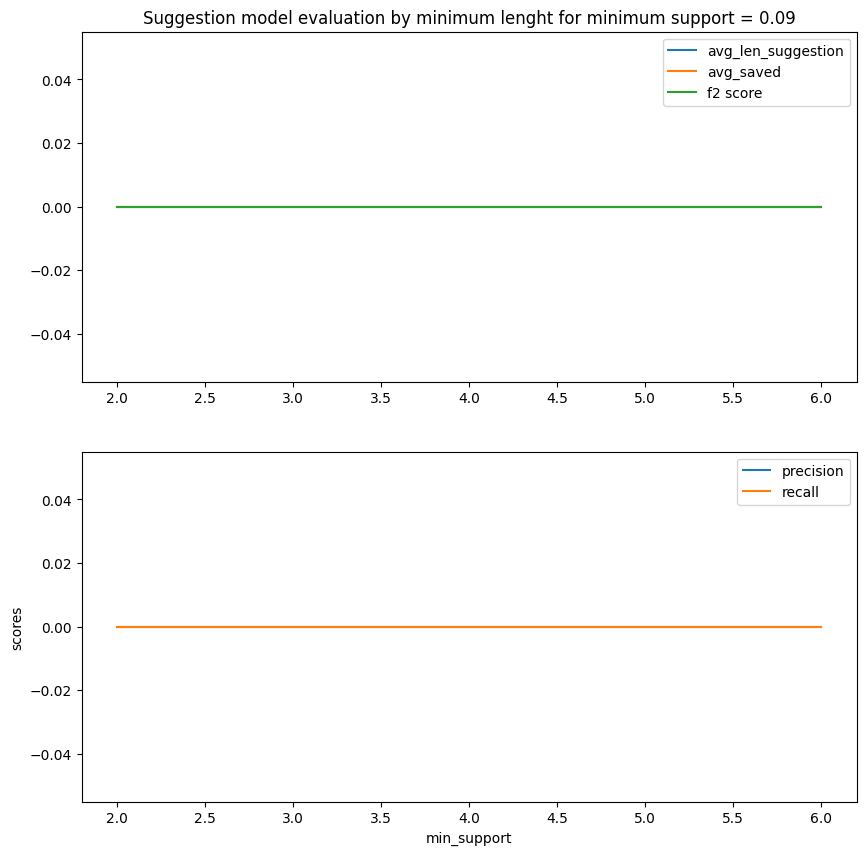

In [114]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(range_min_support, avg_len_suggestion, label='avg_len_suggestion')
plt.plot(range_min_support, avg_saved, label='avg_saved')
plt.plot(range_min_support, f2, label='f2 score')
plt.title('Suggestion model evaluation by minimum lenght for minimum support = 0.09')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(range_min_support, avg_precision, label='precision')
plt.plot(range_min_support, avg_recall, label='recall')
plt.xlabel('min_support')
plt.ylabel('scores')
plt.legend()
plt.show()


# Missed content when parsing

In [15]:
from meshed import DAG
from oa import prompt_function, chat
from functools import partial
template = "I will give you a text extracted from a pdf but with errors like unwated spaces or special characters. You will have to clean it and return the cleaned text. Here is the text: \n\n{content}\n\nPlease clean it and return the cleaned text."
my_chat = partial(chat, temperature=0)
f = prompt_function(template, prompt_func=my_chat)

def concat_json_text(d:dict)->str:
    text = ""
    for key, value in d.items():
        if isinstance(value, dict):
            text += concat_json_text(value)
        elif isinstance(value, list):
            for item in value:
                if isinstance(item, dict):
                    text += concat_json_text(item)
                else:
                    text += str(item) + ", "
        else:
            text +=  str(value) + ", "
    return f(content=text)

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def text(concat_json_text:str)->str:
    return concat_json_text


def lemmentizer(text:str)->list[str]:
    # Tokenisation des mots dans le texte
    tokens = word_tokenize(text)
    
    # Initialisation du lemmatiseur WordNet
    lemmatizer = WordNetLemmatizer()
    
    # Récupération des mots vides (stop words)
    stop_words = set(stopwords.words('english'))

    # Ponctuations à ignorer
    punkt = {'.', ',', ';', '!', '?', ':', '(', ')', '[', ']', '{', '}', '<', '>', '/', '\\', '|', '-', '_', '+', '=', '*', '&', '^', '%', '$', '#', '@', '~', '`', "'", '"'}
    
    # Lemmatisation des mots en ignorant les mots vides
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word not in punkt]
    
    return lemmatized_words

# # Exemple d'utilisation
# text = "I am a developer and I am Working on a project TO develop a NEW application !&&"
# lemmas = lemmentizer(text)
# print(lemmas)

def symetric_difference(text1, text2):
    return set(lemmentizer(text1)).symmetric_difference(set(lemmentizer(text2)))

def intersection(text1, text2):
    if isinstance(text1, str):
        set1 = set(lemmentizer(text1))
    else:
        set1 = text1
    if isinstance(text2, str):
        set2 = set(lemmentizer(text2))
    else:
        set2 = text2
    return set1.intersection(set2)

def missing_words(original_text:str, copy:str)->set:
    return set(lemmentizer(original_text)).difference(set(lemmentizer(copy)))

# text1 = "Rédaction de rapports"
# text2 = "lecture des rapports"

# symetric_difference(text1, text2)
# print(intersection(text1, text2))
# print(missing_words(text1, text2))

def missed_content(original_text:str, json_content:dict):
    json_text = concat_json_text(json_content)
    return symetric_difference(original_text, json_text)

[nltk_data] Downloading package punkt to /Users/alexis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/alexis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
m = missed_content(mall.cvs['quentin.pdf'], content)

NameError: name 'content' is not defined

In [ ]:
mall.cvs['quentin.pdf']

'French\nEnglish\n› TOEIC : 975/990\nExperimen ting VR\nApplica tions\n(C# / U nity)\nModel Training f or\nMachine L earning\nexperimen tation with a\nsmall D atase t\n(Python / Jupyter\nNotebook)\nData Backup and\nEncryp tion S oftware\n(C# / WPF  / MVVM)\nLanguag es\nJavascrip t, C#, Java,\nPython, PHP , C++, C\nFrame work\nAngular , Node, Lar avel,\nReact, S pring, Expr ess,\n.NET\nCommon\nVirtualiza tion, D ocker, Git,\nMongoDB, Linux, Virtual\nReality , SQL, D ata Scienc e\nSoft\nProblem-S olving,\nAdaptability , Attention t o\nDetail, S elf-MotivationQuentin ROMAN\nLooking f or a Job in S oftware Developmen t\nNewly Gradua ted Software Engineer , Team Worker, Motivated and\nPassiona te with ne w Technolo gies.\nEngineering D egree in C omput er Scienc e\nCESI  Nice From 2018  to 2023\nAcademic B ackgr ound\n• Network Administr ation        • Cyber  Security\n• Software Developmen t           • Web D evelopmen t\n• Database M anag emen t             • Data Analysis\n• Project P la

In [ ]:
#build my own tokenizer
from nltk.tokenize import word_tokenize

def tokenizer(text:str)->list[str]:
    return word_tokenize(text)

In [ ]:
MAX_SIZE = 30
from raglab.retrieval.lib_alexis import num_tokens, tokens

def aggregate_sub_dict(d1:dict, d2:dict):
    for key, value in d2.items():
        if key in d1:
            if isinstance(value, dict):
                d1[key] = aggregate(d1[key], value)
            elif isinstance(value, list):
                d1[key] += value
            elif isinstance(value, str):
                d1[key] += value # TODO call llm
        else:
            d1[key] = value
    return d1

d1 = {'name': 'Guillaume', 
      'age': 25, 
      'skills': ['Python', 'Java', 'C++'], 
      'experience': {'company': 'Google', 'position': 'Software Engineer'}
      }

d2 = {'name': 'bidule',
        'skills': ['Python', 'Java', 'C++', 'JavaScript'],
        'experience': {'company': 'Google', 'position': 'Software Engineer', 'duration': '2 years'}
        }

d3 = {'name': 'Alexis'}

aggregate_sub_dict(d1, d2)

{'name': 'Guillaumebidule',
 'age': 25,
 'skills': ['Python', 'Java', 'C++', 'Python', 'Java', 'C++', 'JavaScript'],
 'experience': {'company': 'GoogleGoogle',
  'position': 'Software EngineerSoftware Engineer',
  'duration': '2 years'}}

In [ ]:
from oa import chat
chat("tell me a joke", model="gpt-4-32k")

NotFoundError: Error code: 404 - {'error': {'message': 'The model `gpt-4-32k` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

In [ ]:
from functools import partial
from oa.base import chat
my_chat = partial(chat, model="gpt-4")
f = prompt_function(template, prompt_func=my_chat)

In [ ]:
keywords = mall.config['stacks_keywords.txt']

original = f(mall.cvs['quentin.pdf'])

retreived = concat_json_text(dag('quentin.pdf'))

Content retrieved:  {'FullName': 'Quentin Roman', 'JobTitle': 'Software Engineer', 'avaibility': 'Immediately', 'mobility': 'none', 'seniority': 'Newly Graduated', 'skills': 'Python, C#, Java, JavaScript, Angular, Node, React, .NET, SQL, Git, MongoDB, Linux, Virtual Reality', 'certifications': 'none', 'experiences': [{'title': 'Software Development', 'company': 'Aalborg University Denmark', 'dates': 'September 2021 - February 2022', 'description': 'Developed a VR application for medical purposes, aiding in the recovery of stroke patients.', 'tasks': ['Conducted testing sessions involving students and patients to gather feedback and refine the application', 'Optimized code and implemented multi-threading techniques for enhanced performance', 'Analyzed eye-tracking data for user interaction insights'], 'tools': 'Python, C#, VR technologies'}, {'title': 'Network Administration', 'company': 'Tournaire Grasse, France', 'dates': 'January 2021 - June 2021', 'description': 'Administered networ

In [ ]:
retreived = concat_json_text(second_dict)
missed = missing_words(original, retreived)
missed_keywords = intersection(keywords, missed)
print(missed)
print(missed_keywords)

{'september', 'optimized', 'science', 'involving', 'dataset', 'experimenting', 'grasse', 'engineer', 'technique', 'experience', '2018', 'backup', 'self-motivation', 'cisco', 'efficient', 'notebook', 'production', 'environment', 'angular', 'planning', 'recovery', 'performance', 'june', 'using', 'patient', 'web', 'purpose', 'aiding', 'model', 'newly', 'git', 'attention', 'centralized', 'encryption', 'skill', 'multi-factor', 'nice', 'soft', 'permission', 'january', 'refine', 'system', '975/990', 'medical', 'enhanced', 'authenticator', 'university', 'experimentation', 'investigated', 'tool', 'issue', 'virtual', 'administered', 'implemented', 'conducted', 'collaborated', 'maintained', 'student', 'application', 'virtualization', 'ptr', 'vsphere', 'vpn', 'gather', 'installation', 'jupyter', 'software', 'multi-threading', 'mongodb', 'session', 'tournaire', 'access', 'french', 'linux', 'problem', 'graduated', 'cesi', 'report', '20', 'motivated', 'trouble', 'computer', 'laravel', 'express', 'job

In [ ]:
template_correction = """I will give you a resume and some keywords you have to find in the resume. Then fill my json with the keywords
Here is the resume: \n\n{resume}\n\nHere are the keywords: \n\n{keywords}\n\nHere is the json: \n\n{json}\n\nPlease fill the json with the keywords and preserve the json format with double quotes.
Keep all the initial content of my json and add the missing keywords."""

second_fill = prompt_function(template_correction)

second_json = second_fill(resume=original, keywords=missed_keywords, json=content)

In [ ]:
second_json

'{\n    "FullName": "Guillaume Bernard",\n    "JobTitle": "Ingénieur Backend Junior",\n    "avaibility": "dès aujourd’hui",\n    "mobility": "Missing information",\n    "seniority": "Missing information",\n    "skills": "Python, Java, Docker, Bash",\n    "certifications": "Certificat d\'anglais avancé (C1)",\n    "experiences": [\n        {\n            "title": "Ingénieur Backend Junior",\n            "company": "Beewey Consulting",\n            "dates": "2023 - 3 mois",\n            "description": "Migration de données, développement cloud, microservices, API",\n            "tasks": ["Missing information"],\n            "tools": "C, JSON, Flask, Terraform, VSCode"\n        },\n        {\n            "title": "Ingénieur Fiabilité de Site",\n            "company": "Thales DIS",\n            "dates": "2022 - 1 an",\n            "description": "Service de gestion des incidents",\n            "tasks": ["Missing information"],\n            "tools": "Missing information"\n        },\n      

In [ ]:
import json
second_dict = json.loads(second_json)

In [ ]:
second_dict

{'FullName': 'Guillaume Bernard',
 'JobTitle': 'Ingénieur Backend Junior',
 'avaibility': 'dès aujourd’hui',
 'mobility': 'Missing information',
 'seniority': 'Missing information',
 'skills': 'Python, Java, Docker, Bash',
 'certifications': "Certificat d'anglais avancé (C1)",
 'experiences': [{'title': 'Ingénieur Backend Junior',
   'company': 'Beewey Consulting',
   'dates': '2023 - 3 mois',
   'description': 'Migration de données, développement cloud, microservices, API',
   'tasks': ['Missing information'],
   'tools': 'C, JSON, Flask, Terraform, VSCode'},
  {'title': 'Ingénieur Fiabilité de Site',
   'company': 'Thales DIS',
   'dates': '2022 - 1 an',
   'description': 'Service de gestion des incidents',
   'tasks': ['Missing information'],
   'tools': 'Missing information'},
  {'title': 'Maitre-Nageur',
   'company': 'Aqualand, Parc Aquatique',
   'dates': '2020 - 3 mois',
   'description': 'Surveillant de baignade',
   'tasks': ['Missing information'],
   'tools': 'Missing infor

# Streamlit

In [ ]:
from smart_cv import ContentRetriever
import json 
keywords_text = """Python, C,, Perl, Ruby, MatLab, Mathematica, Assembleur, VB, XML, Java, JEE, J2EE, JavaScript, PHP, R,, CSS, C\+\+, IOS, Swift, Android, Kotlin, Flutter, Dart, Rust, Ionic, Cordova, Reactnative, Xamarin, Babylon.js, C\#, F\#, WordPress, ThreeJS, WebGL,
TensorFlow, Spark, Spring, Angular, Structs, Ember, Vue, Django, React, .NET,, .NET Core, Cocoapods, Osgi, Selenium, QA, Nest, Express, Symphony, Falcon, ASP.NET, WinDev, Flask, PySpark, Hibernate,
Hive, Impala, Oracle, MySQL, Acess, SQL, SQL Server, PostgreSQL, Mongo, MariaDB, DBA,
API, Unit Testing, Test Unitaire, Azure, Docker, Bamboo, Kubernetes, Jenkins, Jasmine, Karma, MVC, AWS,
Git, Tortoise, TFS, CVS, SVN, MVC, GNU RCS, GNU CSSC, CVSNT, GNU arch, Darcs, DCVS, Monotone, Codeville, Mercurial, Bazaar, Fossil, Veracity, Pijul, SCCS, PVCS, Rational ClearCase, Harvest, CMVC, Visual SourceSafe, AccuRev SCM, Sourceanywhere, Team Foundation Server, Rational Synergy, Rational Team Concert, BitKeeper, Plastic SCM, IIS active directory, 2IS,
Datawarehouse, Machine Learning, NLP, DeepLearning, Réseau de Neurones, kNN, k\-NN, Régression Linéaire, SVM, Régression Logistique, Arbre de Décission, Fôrets Aléatoires, gradient boosting, PCA, Analyse en Composantes Principales, DataLake, DataFactory, PowerBI, Tableau, Qlikesense, GCP, OpenCV, Computer Vision, 
Gestion, Organization, Management, Agile, Scrum, Trello, JIRA, MS Project, Confluence, Sprint, GANTT, Specifications, Redaction, Cahier de charges, Workshop, Atelier, AMOA, PMO"""
with open("prompt_dict.json", "r") as f:
    prompt_dict = json.load(f)

def match_kewords(keywords_text, text):
    """ Returns """
    keywords = keywords_text.split(", ")
    kw_list = []
    for kw in keywords:
        if kw in text:
            if kw in ["R,", "C,"]:
                continue
            kw_list.append(kw)
    for letter in ["R", "C"]:
        for specials in [" {letter}.", " {letter},", " {letter} "]:
            if specials in text:
                kw_list.append(letter)
    return kw_list

def keywords_score(matched, pred):
    pred = [kw.lower() for kw in pred]
    score = 0
    sames = []
    missed = []
    for kw in matched:
        if kw.lower() in pred:
            score += 1
            sames.append(kw)
        else:
            missed.append(kw)
    score = score / len(matched)
    return score, sames, missed

In [ ]:
print(match_kewords(keywords_text, parser.dict_content["competences"]))

['Python', 'Perl', 'Java', 'Selenium', 'Express', 'Azure', 'Docker', 'Kubernetes', 'Jenkins', 'SVN']


In [ ]:
print(match_kewords(keywords_text, parser.dict_content["competences"]))

In [ ]:
#get list of files in directory
import os
directory = "../smart_cv/data/cvs"
files = os.listdir(directory)
# remove .DS_Store file
files.remove(".DS_Store")
print(files)
key = "your key here"
avg_score = 0
for cv_file in files:
    print(f"\nprocessing {cv_file}")
    parser = ContentRetriever(cv_path=directory+"/"+cv_file, api_key=key,
                    prompts=prompt_dict, chunk_size=20000, chunk_overlap=0, temperature=1.5, k=5)

    fullcontent = "" 
    for doc in parser.documents:
        fullcontent += doc.page_content

    matched = match_kewords(keywords_text, fullcontent)
    print(f"matched: {matched}")
    parser.retrieve_content(verbose=False)

    llm_keywords = parser.dict_content["competences"].split(", ")
    print(f"llm_keywords: {llm_keywords}")
    score, intersection, missed = keywords_score(matched, llm_keywords)
    avg_score += score
    print(f"score: {score},\n intersection: {intersection},\n missed: {missed}")

avg_score = avg_score / len(files)
print(f"average score: {avg_score}")

['Guillaume.pdf', 'SCH.pdf', 'Adil.pdf', 'Nappee-Thomas.pdf', 'Thor_Whalen_CV.pdf']

processing Guillaume.pdf
matched: ['Python', 'Java', 'JavaScript', 'CSS', 'Spring', 'Flask', 'SQL', 'PostgreSQL', 'Docker', 'GCP']


InternalServerError: Error code: 500 - {'error': {'message': 'Failed to create completion as the model generated invalid Unicode output. Unfortunately, this can happen in rare situations. Consider reviewing your prompt or reducing the temperature of your request. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID req_eccc43ef3a5318f641401cc799dbf0e4 in your message.)', 'type': 'server_error', 'param': None, 'code': 'invalid_model_output'}}

Temperature=0 => avg score = 0.327
Temperature=0.5 => avg score = 0.27
Temperature=1 => avg score = 0.30


# Check content with instructions

In [ ]:
instructions = [
            "Less than 11 bullet points for each experience",
            "More than 3 bullet points for each experience",
            "Framework versions have to be mentioned",
            "Tasks done during experiences have to be mentioned",
            "Context of the projects have to be mentioned: like dates, role, team size, company size, etc",
            "Technical stacks have to be mentioned in experiences",
            "There has to be contact information",
            "If the profil is developer, there has to be a github link. Otherwise it is ok if there is no github link"
]

In [ ]:
from misc.CriteriaChecker import CriteriaChecker

In [ ]:
cc = CriteriaChecker(instructions, parser.dict_content)

In [ ]:
cc.score

0.875

In [ ]:
cc.status

{'Less than 11 bullet points for each experience': True,
 'More than 3 bullet points for each experience': True,
 'Framework versions have to be mentioned': True,
 'Tasks done during experiences have to be mentioned': True,
 'Context of the projects have to be mentioned: like dates, role, team size, company size, etc': True,
 'Technical stacks have to be mentioned in experiences': True,
 'There has to be contact information': True,
 'If the profil is developer, there has to be a github link. Otherwise it is ok if there is no github link': False}

In [ ]:
cc.add_criterion("French or English language")

In [ ]:
cc.status  

{'Less than 11 bullet points for each experience': True,
 'More than 3 bullet points for each experience': True,
 'Framework versions have to be mentioned': True,
 'Tasks done during experiences have to be mentioned': True,
 'Context of the projects have to be mentioned: like dates, role, team size, company size, etc': True,
 'Technical stacks have to be mentioned in experiences': True,
 'There has to be contact information': True,
 'If the profil is developer, there has to be a github link. Otherwise it is ok if there is no github link': True,
 'French or English language': True}

In [ ]:
cc.score

1.0

In [ ]:
cc.feedback()

NameError: name 'cc' is not defined